In [1]:
import sys
import os
from pysides.load_params import *
import matplotlib
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
from gen_all_sizes_TIM_cubes import sorted_files_by_n
import camb
import glob

In [2]:
params = load_params('PAR_FILES/SIDES_from_original_with_fir_lines.par')
TIM_params = load_params('PAR_FILES/Uchuu_cubes_for_TIM.par')

plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':True})
plt.rcParams.update({'ytick.right':True})

for n, (tile_sizeRA, tile_sizeDEC) in enumerate(TIM_params['tile_sizes']):
    dict_pks_name='dict_dir/'+f'pySIDES_from_uchuu_{tile_sizeRA}deg_x_{tile_sizeDEC}deg.p' 
    dict = pickle.load( open(dict_pks_name, 'rb'))
    print(dict['0']['pk_3D_z0.63_CII_de_Looze'].keys())

dict_keys(['k_out_sphere #Mpc-1', 'k_out_transv #Mpc-1', 'k_out_z #Mpc-1', 'pk_out_sphere #Jy2sr-2Mpc3', 'pk_out #Jy2sr-2Mpc3', 'cross pk_out_sphere #Jysr-1Mpc3', 'cross pk_out #Jysr-1Mpc3', 'nb_count_sphere', 'nb_count_transv', 'nb_count_z', 'k_bins #Mpc-1'])
dict_keys(['k_out_sphere #Mpc-1', 'k_out_transv #Mpc-1', 'k_out_z #Mpc-1', 'k_bins #Mpc-1', 'pk_out_sphere #Jy2sr-2Mpc3', 'pk_out #Jy2sr-2Mpc3', 'cross pk_out_sphere #Jysr-1Mpc3', 'cross pk_out #Jysr-1Mpc3', 'nb_count_sphere', 'nb_count_transv', 'nb_count_z'])
dict_keys(['k_out_sphere #Mpc-1', 'k_out_transv #Mpc-1', 'k_out_z #Mpc-1', 'k_bins #Mpc-1', 'pk_out_sphere #Jy2sr-2Mpc3', 'pk_out #Jy2sr-2Mpc3', 'cross pk_out_sphere #Jysr-1Mpc3', 'cross pk_out #Jysr-1Mpc3', 'nb_count_sphere', 'nb_count_transv', 'nb_count_z'])
dict_keys(['k_out_sphere #Mpc-1', 'k_out_transv #Mpc-1', 'k_out_z #Mpc-1', 'k_bins #Mpc-1', 'pk_out_sphere #Jy2sr-2Mpc3', 'pk_out #Jy2sr-2Mpc3', 'cross pk_out_sphere #Jysr-1Mpc3', 'cross pk_out #Jysr-1Mpc3', 'nb_count

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

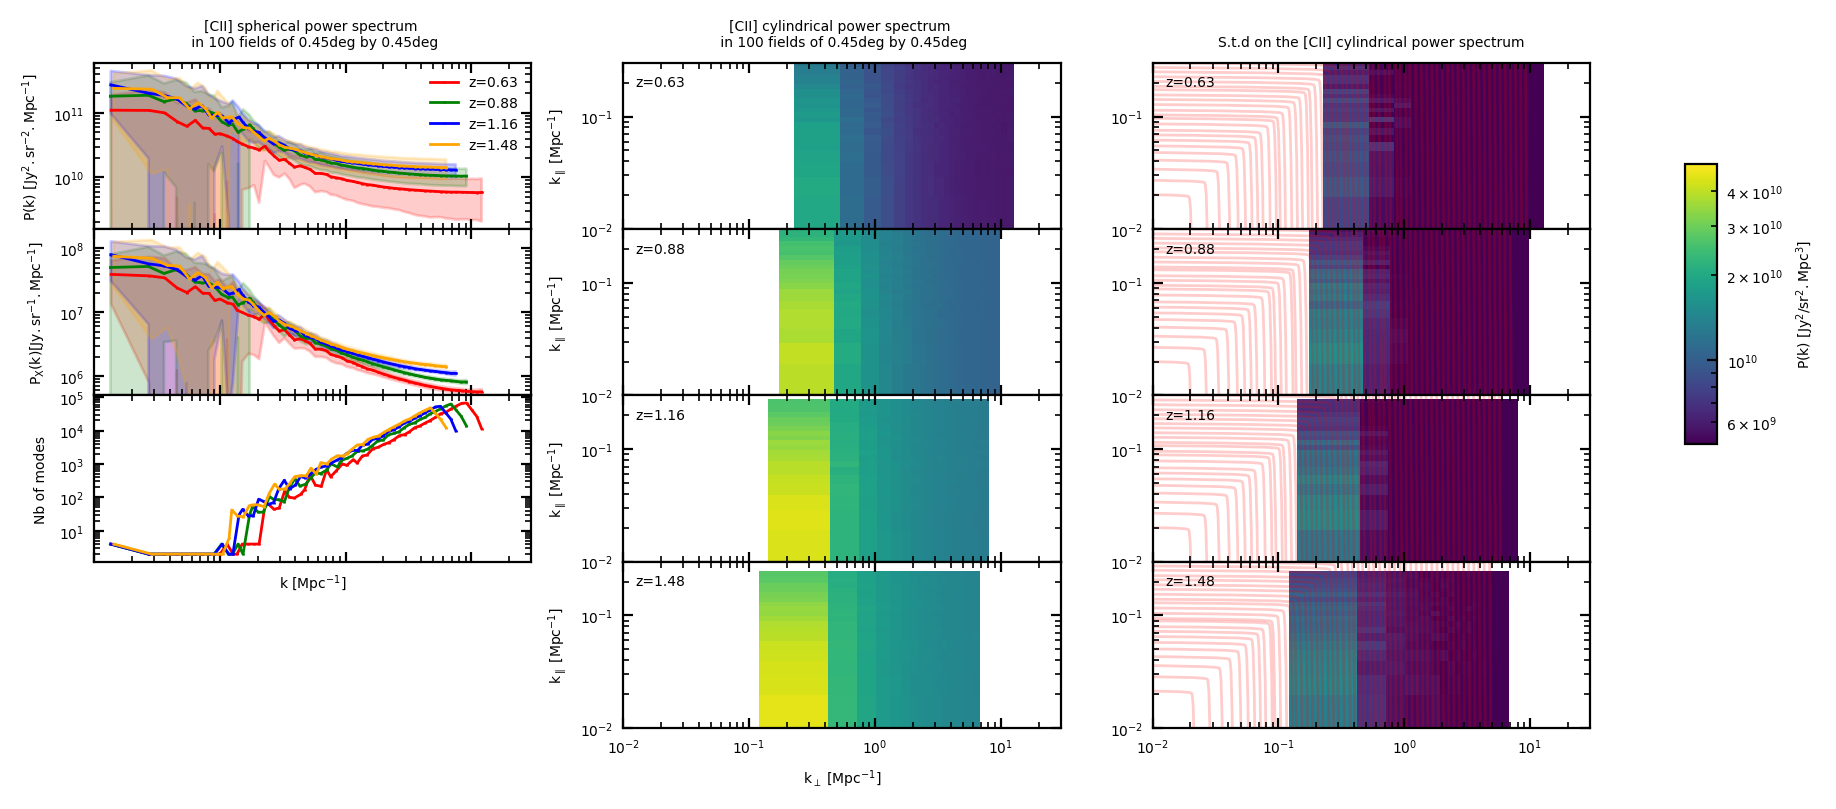

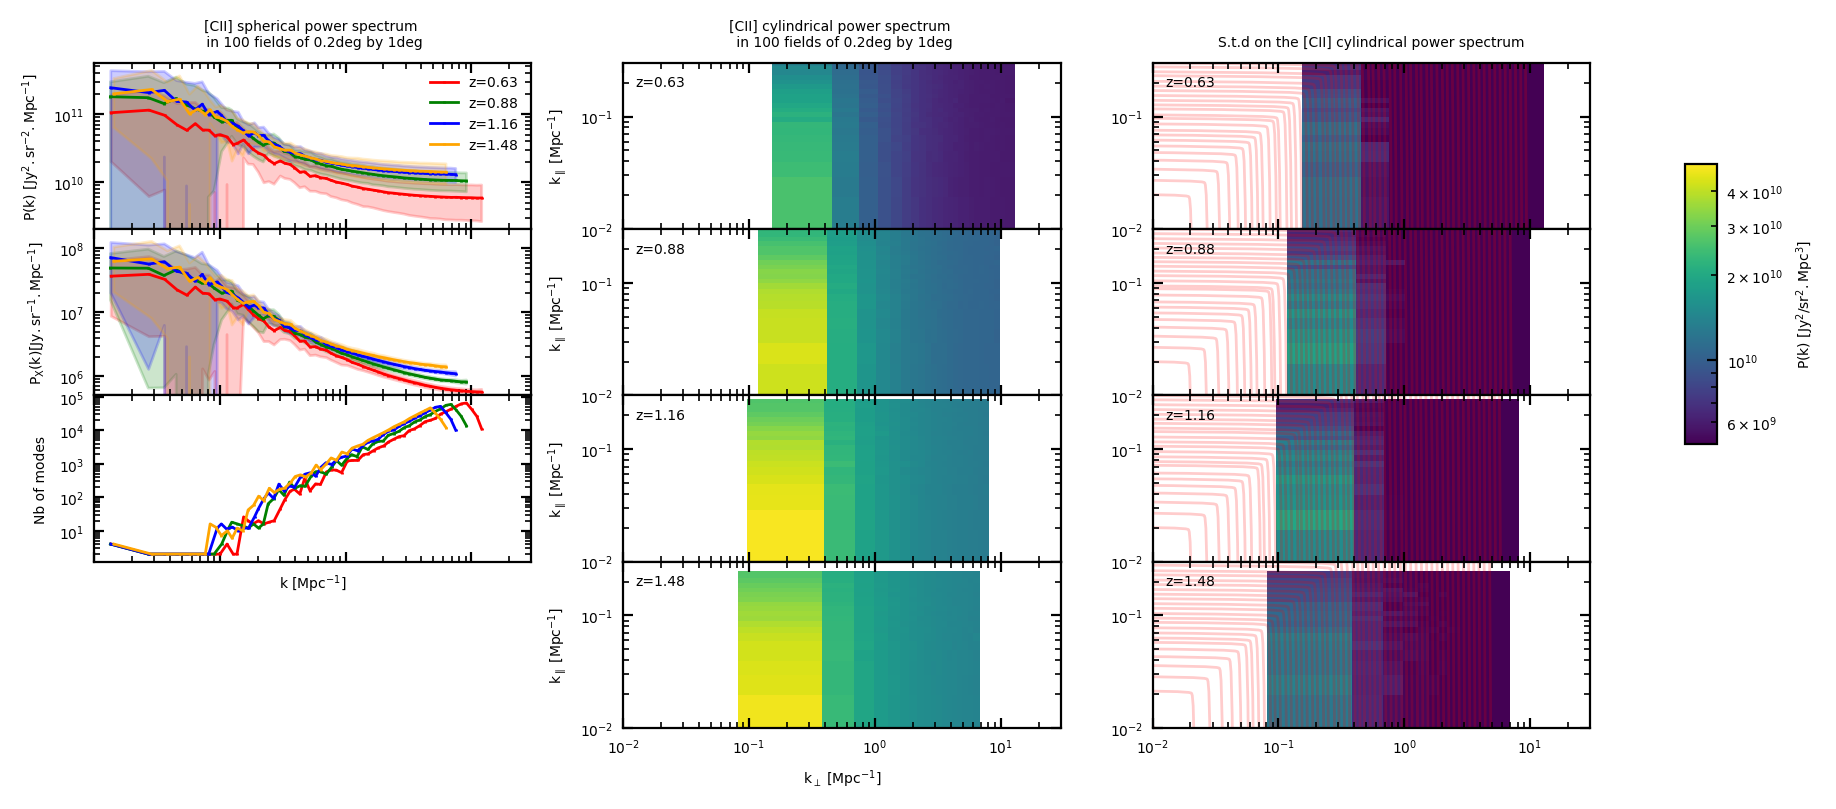

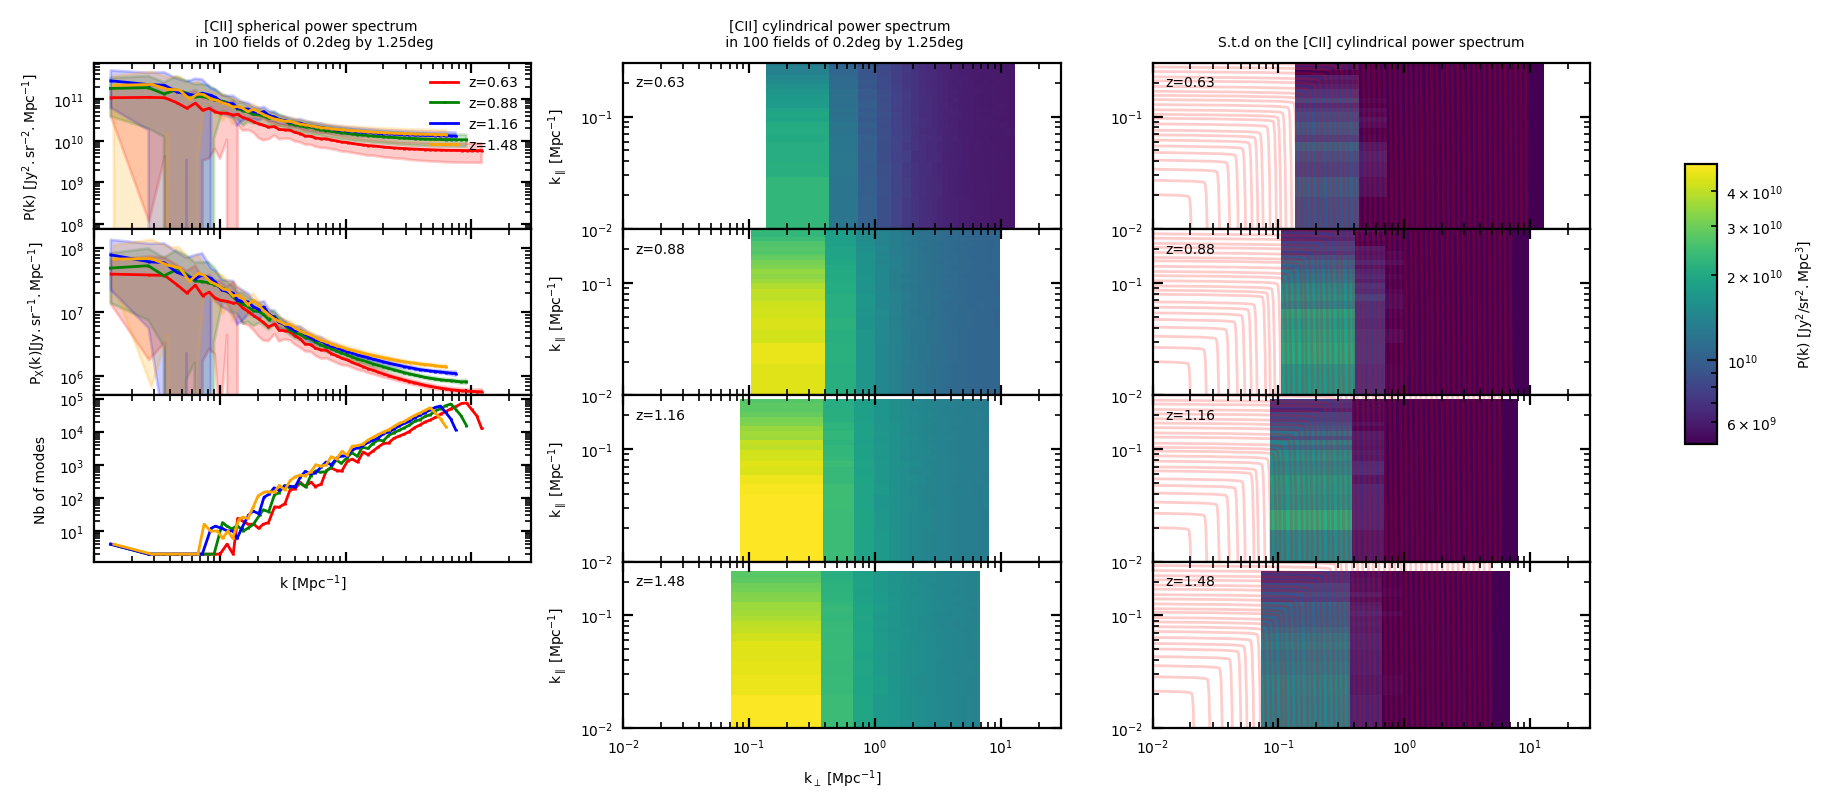

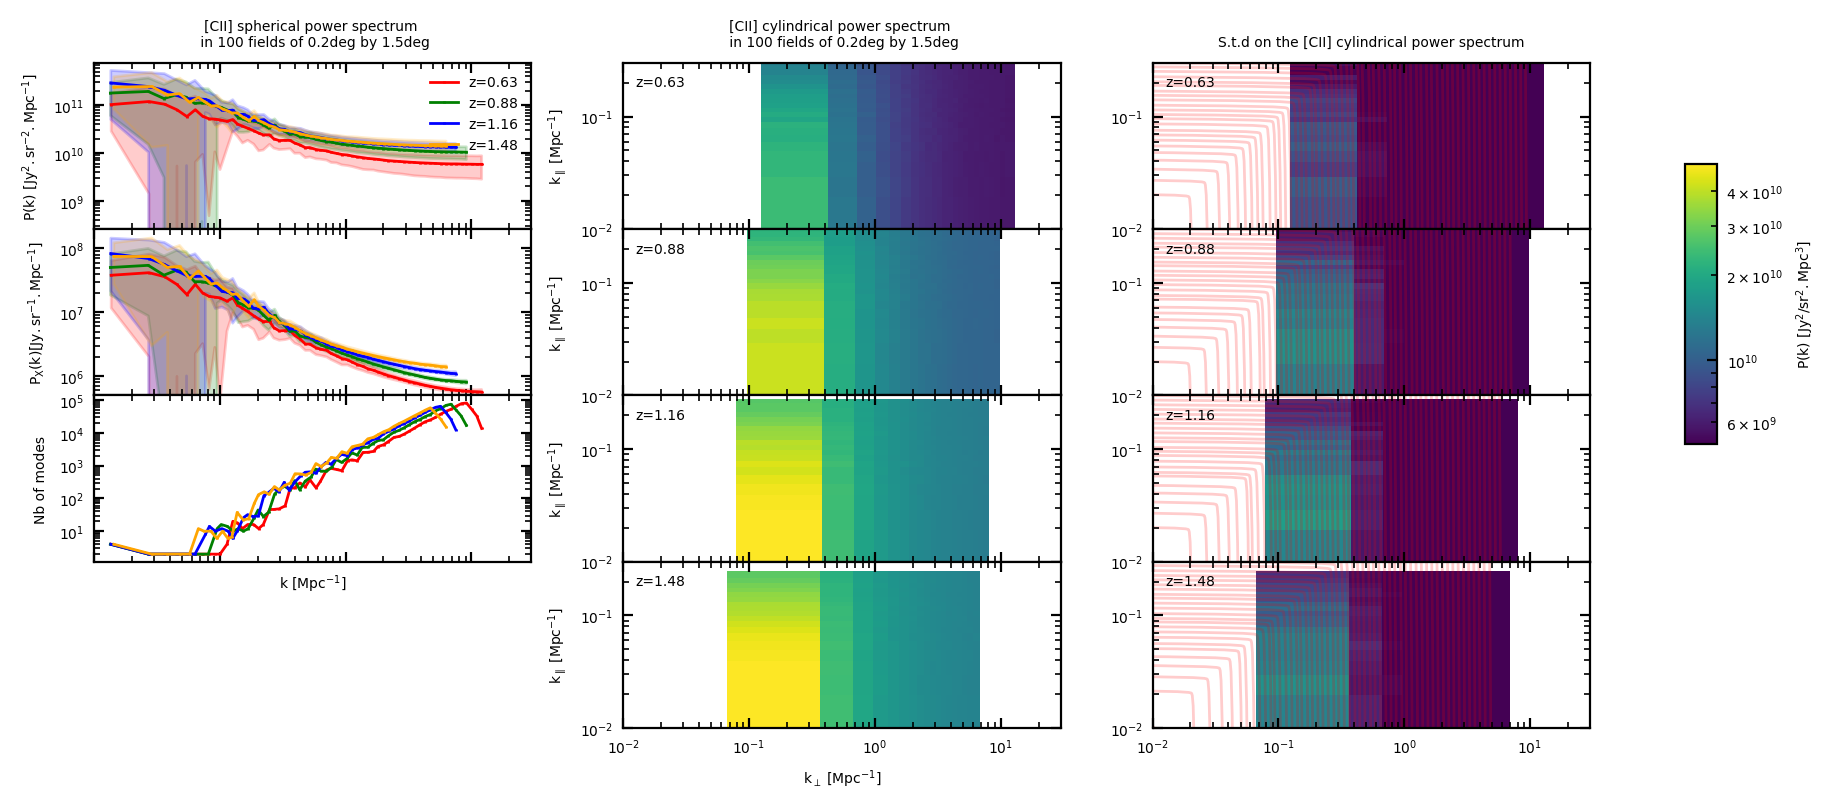

In [15]:
for n, (tile_sizeRA, tile_sizeDEC) in enumerate(TIM_params['tile_sizes']):

    dict_pks_name='dict_dir/'+f'pySIDES_from_uchuu_{tile_sizeRA}deg_x_{tile_sizeDEC}deg.p' 
    dict = pickle.load( open(dict_pks_name, 'rb'))
    nb_subfields = len(dict.keys())

    BS=5; plt.rc('font', size=BS); plt.rc('axes', titlesize=BS); plt.rc('axes', labelsize=BS); lw=1; mk=1; elw=1; ft=BS
    fig, axs = plt.subplots(4,3,figsize=(8,4), sharex=True, dpi=200)
    ax,axx,axnb = axs[0,0], axs[1,0],axs[2,0]
    axs[3, 0].remove()

    for iz, (z_center, c) in enumerate(zip(TIM_params['z_centers'], ('r', 'g', 'b', 'orange'))):

        k = dict['0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_out_sphere #Mpc-1'].value
        k_z_edges, k_transv_edges = dict[f'0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_bins #Mpc-1']


        pk_sphere_list = []
        xpk_sphere_list = []
        nbmode_list = []
        pk_cyl_list = []
        for l in range(nb_subfields):
            pk_sphere_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['pk_out_sphere #Jy2sr-2Mpc3'].value)
            #print(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze'].keys())
            nbmode_list.append( dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['nb_count_sphere'] )
            xpk_sphere_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['cross pk_out_sphere #Jysr-1Mpc3'])
            pk_cyl_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['pk_out #Jy2sr-2Mpc3'])
        #dict_keys(['k_out_sphere #Mpc-1', 'k_out_transv #Mpc-1', 'k_out_z #Mpc-1', 
        # 'pk_out_sphere #Jy2sr-2Mpc3', 'pk_out #Jy2sr-2Mpc3', 'cross pk_out_sphere #Jysr-1Mpc3', 
        # 'cross pk_out #Jysr-1Mpc3', 'nb_count_sphere', 'nb_count_transv', 'nb_count_z', 'k_bins #Mpc-1'])

        nbmode_list = np.asarray(nbmode_list)
        pk_sphere_list = np.asarray(pk_sphere_list)
        xpk_sphere_list = np.asarray(xpk_sphere_list)
        pk_cyl_list = np.asarray(pk_cyl_list)
        mean = np.mean(pk_sphere_list, axis=0)
        std  = np.std( pk_sphere_list, axis=0) 
        xmean = np.mean(xpk_sphere_list, axis=0)
        xstd  = np.std( xpk_sphere_list, axis=0) 
        meannmode = np.mean(nbmode_list, axis=0)
        stdnmode = np.std(nbmode_list, axis=0)
        pk_cyl_mean = np.mean(pk_cyl_list, axis=0)
        pk_cyl_std = np.std(pk_cyl_list, axis=0)


        #['k_out_sphere #Mpc-1', 'k_out_transv #Mpc-1', 'k_out_z #Mpc-1', 
        # 'pk_out_sphere #Jy2sr-2Mpc3', 'pk_out #Jy2sr-2Mpc3', 
        # 'cross pk_out_sphere #Jysr-1Mpc3', 'cross pk_out #Jysr-1Mpc3', 
        # 'nb_count_sphere', 'nb_count_transv', 'nb_count_z', 'k_bins #Mpc-1'])

        # Use pcolormesh to create the 2D histogram plot with logarithmic color scaling
        # We need to provide the bin edges for the plot
        C = axs[iz,1].pcolormesh(k_transv_edges, k_z_edges,  pk_cyl_mean, 
                            shading='auto', cmap='viridis', norm=LogNorm(vmin=5e9, vmax=5e10)) #vmin = pk_out_sphere.min(), vmax=pk_out_sphere.max() 
        Cstd = axs[iz,2].pcolormesh(k_transv_edges, k_z_edges,  pk_cyl_std, 
                            shading='auto', cmap='viridis', norm=LogNorm(vmin=5e9, vmax=5e10))
        
        for kvalue in k:
            circle = patches.Circle((0., 0.), kvalue, edgecolor='r', facecolor='none', alpha=0.2)
            axs[iz,2].add_patch(circle)
        axs[iz,1].set_xlim(1e-2,3e1)
        axs[iz,1].set_ylim(1e-2,3e-1)
        axs[iz,2].set_ylim(1e-2,3e-1)
        
        ax.loglog(k,mean,'-|',c=c,label=f'z={z_center}', markersize=mk, lw=lw )
        ax.fill_between(k,mean-std, mean+std, color=c,alpha=0.2 )
        axx.loglog(k, xmean, '-|',c=c, markersize=mk, lw=lw)
        axx.fill_between(k,xmean-xstd, xmean+xstd, color=c,alpha=0.2 )

        axnb.loglog(k, meannmode, '-|',color=c, lw=lw,markersize=mk,)
        #axnb.loglog(dict[f'0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_out_transv #Mpc-1'][0,:], dict[f'0'][f'pk_3D_z{z_center}_CII_de_Looze']['nb_count_transv'], 
        #'--',color=c, lw=lw,)
        #axnb.loglog(dict[f'0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_out_z #Mpc-1'][:,0], dict[f'0'][f'pk_3D_z{z_center}_CII_de_Looze']['nb_count_z'],
        #      ':',color=c, lw=lw,)
        # Set the axis labels
        axs[iz,1].set_ylabel('$\\rm k_{\\parallel}$ [$\\rm Mpc^{-1}$]')
        # Set log scales for the axes
        axs[iz,1].set_yscale('log')#k_bintab_transv.min().value,k_bintab_transv.max().value)
        axs[iz,2].set_yscale('log')#k_bintab_transv.min().value,k_bintab_transv.max().value)
        axs[iz,1].legend(title=f'z={z_center}', loc='upper left', frameon=False)
        axs[iz,2].legend(title=f'z={z_center}', loc='upper left', frameon=False)

    axs[3,1].set_xlabel('$\\rm k_{\\perp}$ [$\\rm Mpc^{-1}$]')
    ax.legend(fontsize=ft, loc= 'upper right', frameon=False)
    axx.set_ylim(5e5, 2e8)
    axnb.set_ylabel('Nb of modes')
    axnb.set_xlabel('k [$\\rm Mpc^{-1}$]')
    ax.set_ylabel('P(k) [$\\rm Jy^2.sr^{-2}.Mpc^{-1}$]')
    axx.set_ylabel('$\\rm P_X(k) [ Jy.sr^{-1}.Mpc^{-1}$]')
    ax.set_title(f'[CII] spherical power spectrum \n in {nb_subfields} fields of {tile_sizeRA}deg by {tile_sizeDEC}deg')
    axs[0,1].set_title(f'[CII] cylindrical power spectrum \n in {nb_subfields} fields of {tile_sizeRA}deg by {tile_sizeDEC}deg')
    axs[0,2].set_title(f'S.t.d on the [CII] cylindrical power spectrum')

    fig.tight_layout()
    fig.subplots_adjust(hspace=0)

    cbar_ax_cividis = fig.add_axes([1.05, 0.45, 0.02, 0.35])  # [left, bottom, width, height]
    cbar_cividis = fig.colorbar(C, cax=cbar_ax_cividis)
    cbar_cividis.set_label('$\\rm P(k)$ $\\rm[Jy^2/sr^2.Mpc^3]$')

    fig.savefig(f'figures/pySIDES_from_uchuu_{tile_sizeRA}deg_x_{tile_sizeDEC}deg_3d_CII_pk.png', transparent=True)


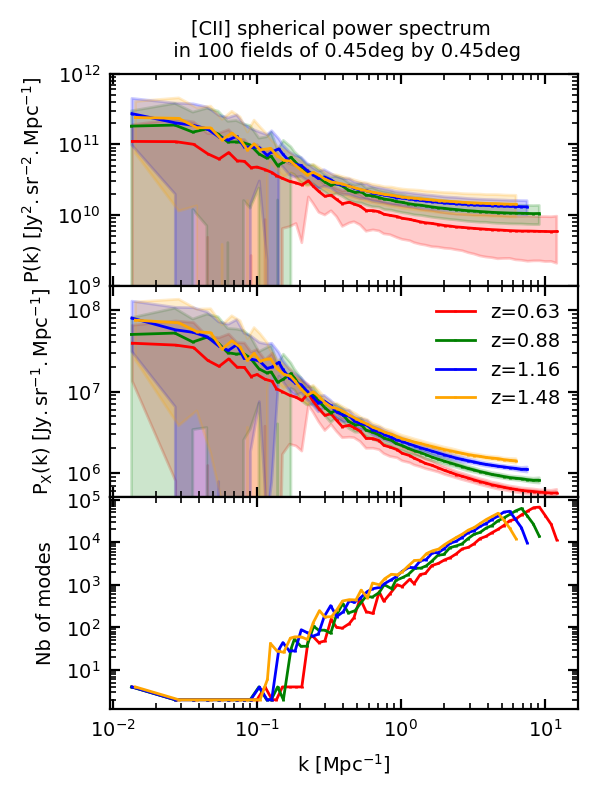

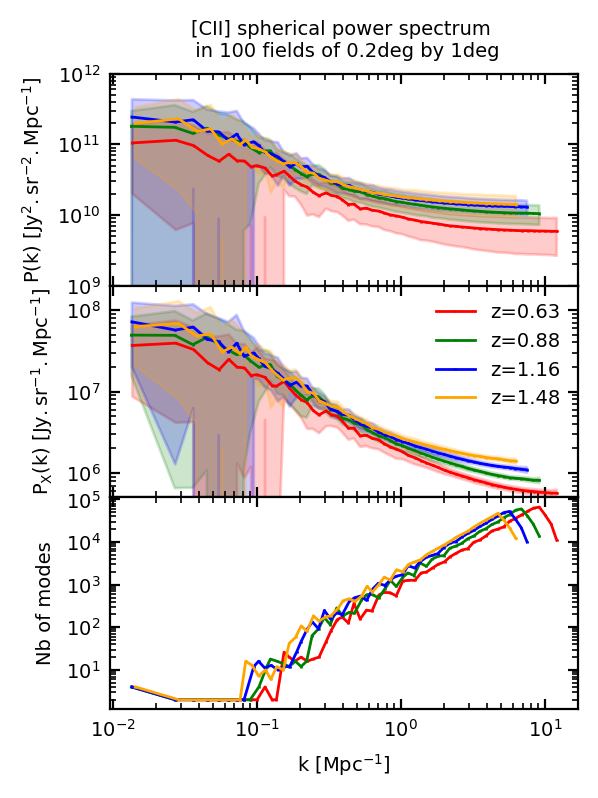

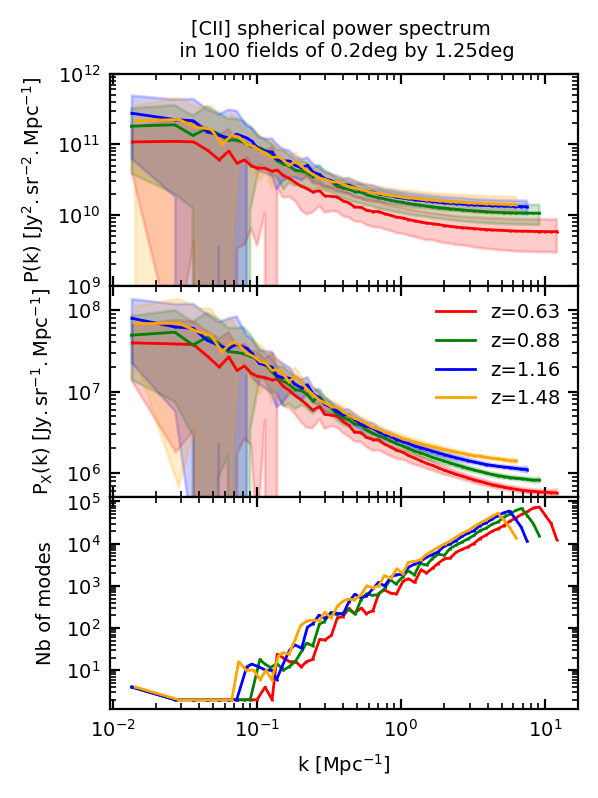

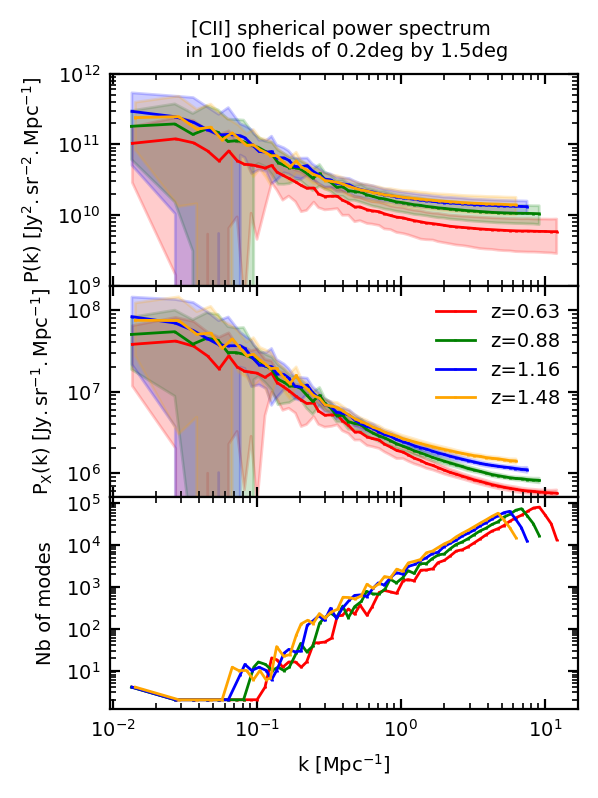

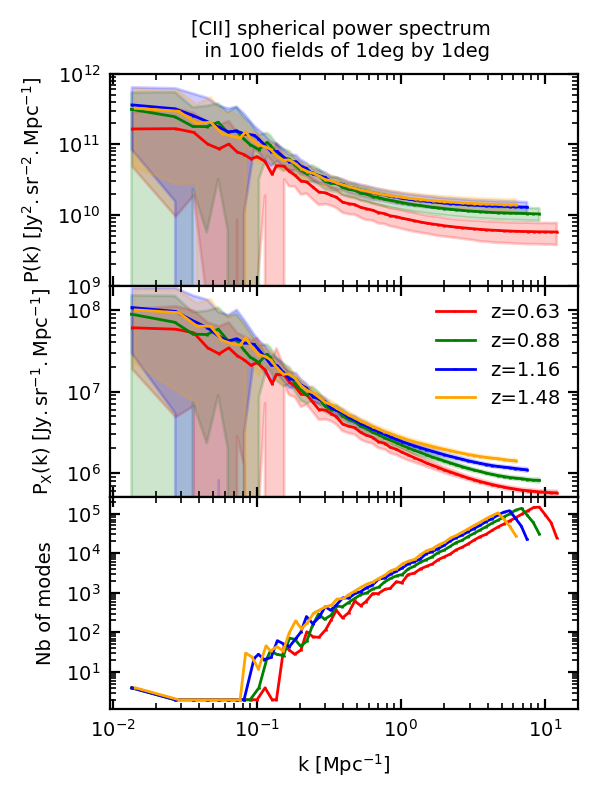

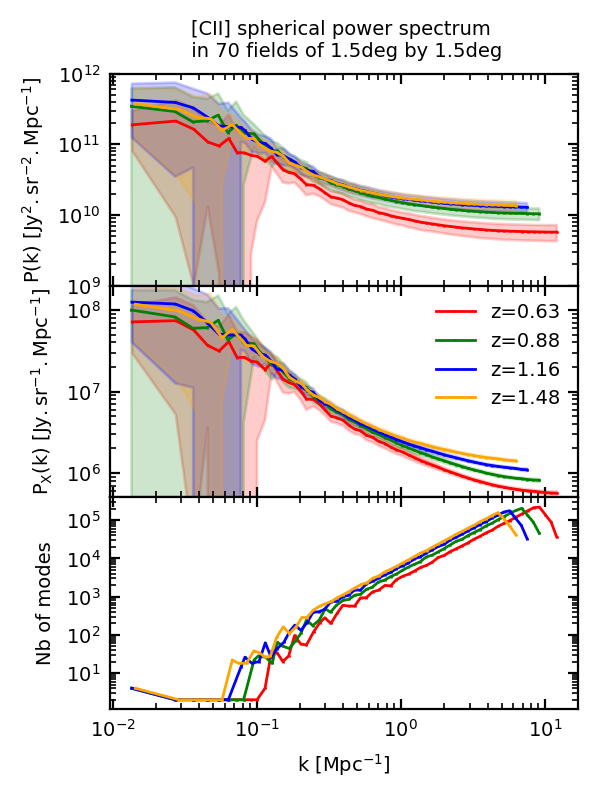

In [35]:
for n, (tile_sizeRA, tile_sizeDEC) in enumerate(TIM_params['tile_sizes']):

    dict_pks_name='dict_dir/'+f'pySIDES_from_uchuu_{tile_sizeRA}deg_x_{tile_sizeDEC}deg.p' 
    dict = pickle.load( open(dict_pks_name, 'rb'))
    nb_subfields = len(dict.keys())

    BS=7; plt.rc('font', size=BS); plt.rc('axes', titlesize=BS); plt.rc('axes', labelsize=BS); lw=1; mk=1; elw=1; ft=BS
    fig, axs = plt.subplots(3,1,figsize=(3,4), sharex=True, dpi=200)
    ax,axx,axnb = axs[0], axs[1],axs[2]
    '''
    for iz, (z_center, c) in enumerate(zip(TIM_params['z_centers'], ('r', 'g', 'b', 'orange'))):

        k = dict['0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_out_sphere #Mpc-1'].value
        k_z_edges, k_transv_edges = dict[f'0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_bins #Mpc-1']

        for l in range(nb_subfields):
            ax.loglog(k,dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['pk_out_sphere #Jy2sr-2Mpc3'].value
                      ,c=c, markersize=mk, lw=lw,alpha=0.01 )
            
            axx.loglog(k,dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['cross pk_out_sphere #Jysr-1Mpc3']
                      ,c=c, markersize=mk, lw=lw,alpha=0.01 )
    
    ''' 
    for iz, (z_center, c) in enumerate(zip(TIM_params['z_centers'], ('r', 'g', 'b', 'orange'))):

        k = dict['0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_out_sphere #Mpc-1'].value
        k_z_edges, k_transv_edges = dict[f'0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_bins #Mpc-1']


        pk_sphere_list = []
        xpk_sphere_list = []
        nbmode_list = []
        pk_cyl_list = []
        for l in range(nb_subfields):

            pk_sphere_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['pk_out_sphere #Jy2sr-2Mpc3'].value)
            #print(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze'].keys())
            nbmode_list.append( dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['nb_count_sphere'] )
            xpk_sphere_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['cross pk_out_sphere #Jysr-1Mpc3'])
            pk_cyl_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['pk_out #Jy2sr-2Mpc3'])
        #dict_keys(['k_out_sphere #Mpc-1', 'k_out_transv #Mpc-1', 'k_out_z #Mpc-1', 
        # 'pk_out_sphere #Jy2sr-2Mpc3', 'pk_out #Jy2sr-2Mpc3', 'cross pk_out_sphere #Jysr-1Mpc3', 
        # 'cross pk_out #Jysr-1Mpc3', 'nb_count_sphere', 'nb_count_transv', 'nb_count_z', 'k_bins #Mpc-1'])


        nbmode_list = np.asarray(nbmode_list)
        pk_sphere_list = np.asarray(pk_sphere_list)
        xpk_sphere_list = np.asarray(xpk_sphere_list)
        pk_cyl_list = np.asarray(pk_cyl_list)
        mean = np.mean(pk_sphere_list, axis=0)
        std  = np.std( pk_sphere_list, axis=0) 
        xmean = np.mean(xpk_sphere_list, axis=0)
        xstd  = np.std( xpk_sphere_list, axis=0) 
        meannmode = np.mean(nbmode_list, axis=0)
        stdnmode = np.std(nbmode_list, axis=0)
        pk_cyl_mean = np.mean(pk_cyl_list, axis=0)
        pk_cyl_std = np.std(pk_cyl_list, axis=0)

        
        ax.loglog(k,mean,'-|',c=c, markersize=mk, lw=lw )
        ax.fill_between(k,mean-std, mean+std, color=c,alpha=0.2 )
        axx.loglog(k, xmean, '-|',c=c, markersize=mk, lw=lw,label=f'z={z_center}',)
        axx.fill_between(k,xmean-xstd, xmean+xstd, color=c,alpha=0.2 )

        axnb.loglog(k, meannmode, '-|',color=c, lw=lw,markersize=mk,)


    axx.legend(fontsize=ft, loc= 'upper right', frameon=False)
    axx.set_ylim(5e5, 2e8)
    ax.set_ylim(1e9, 1e12)

    axnb.set_ylabel('Nb of modes')
    axnb.set_xlabel('k [$\\rm Mpc^{-1}$]')
    ax.set_ylabel('P(k) [$\\rm Jy^2.sr^{-2}.Mpc^{-1}$]')
    axx.set_ylabel('$\\rm P_X(k)$ $\\rm [ Jy.sr^{-1}.Mpc^{-1}$]')
    ax.set_title(f'[CII] spherical power spectrum \n in {nb_subfields} fields of {tile_sizeRA}deg by {tile_sizeDEC}deg')


    fig.tight_layout()
    fig.subplots_adjust(hspace=0)

    fig.savefig(f'figures/pySIDES_from_uchuu_{tile_sizeRA}deg_x_{tile_sizeDEC}deg_3d_CII_pk.png', transparent=True)


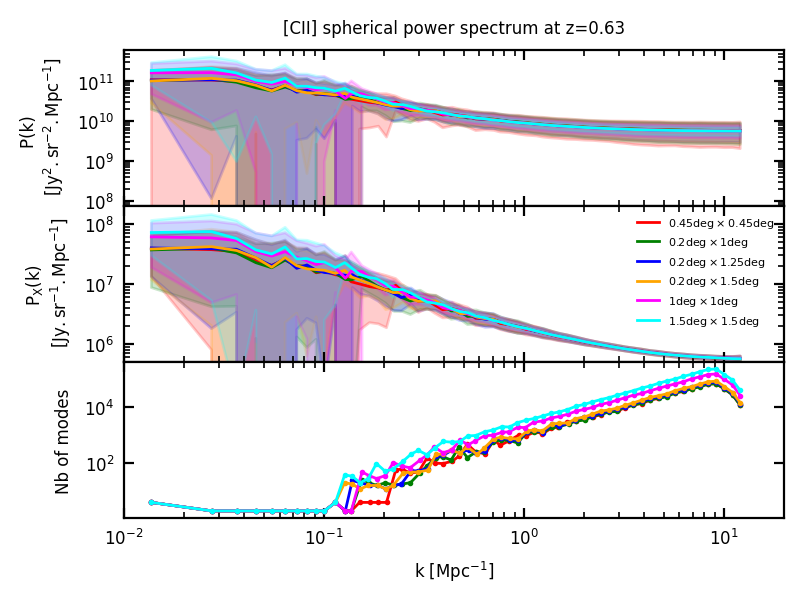

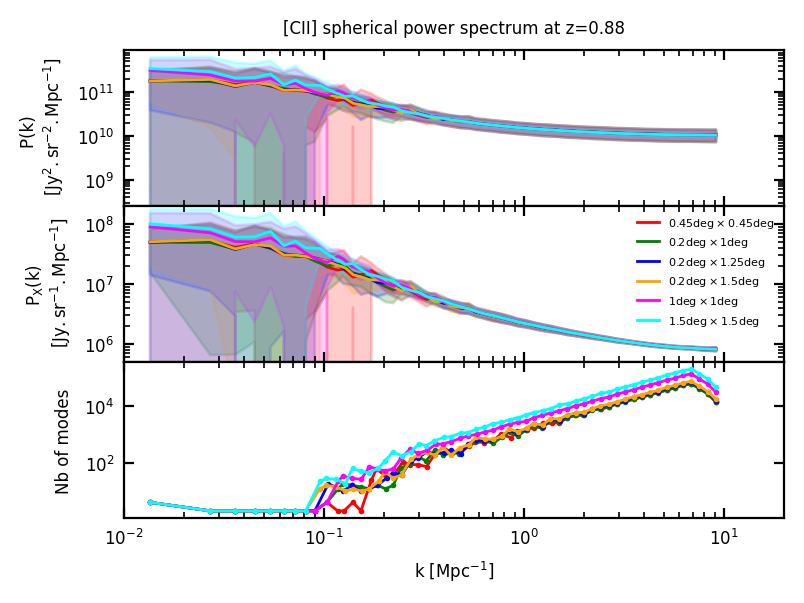

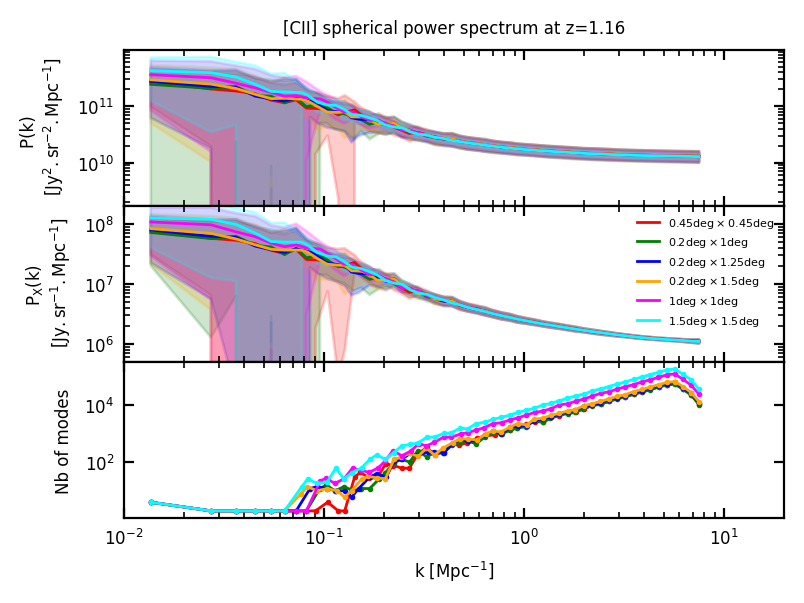

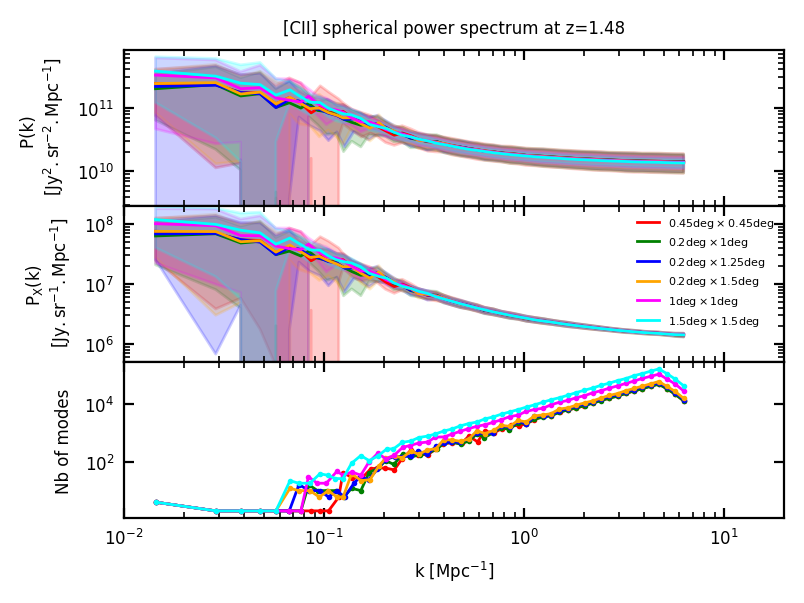

In [14]:
pars = camb.read_ini("planck2018.ini")

for z_center, d in zip(TIM_params['z_centers'], ('r', 'g', 'b', 'orange')):

    pars.set_matter_power(redshifts=[z_center], kmax=1)
    results = camb.get_results(pars)    
    #Linear spectra
    kcamb,_,pk_matter_lin = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit= False)
    BS=6; plt.rc('font', size=BS); plt.rc('axes', titlesize=BS); plt.rc('axes', labelsize=BS); lw=1; mk=1; elw=1; ft=BS

    fig, (ax,axx,axnb) = plt.subplots(3,1,figsize=(4,3), sharex=True, dpi=200)
    lw=1;mk=1
    color= ('r', 'g', 'b', 'orange', 'magenta', 'cyan')
    ax.set_xlim(1e-2,2e1)
    for n, (tile_sizeRA, tile_sizeDEC) in enumerate(TIM_params['tile_sizes']):
        c=color[n]

        dict_pks_name='dict_dir/'+f'pySIDES_from_uchuu_{tile_sizeRA}deg_x_{tile_sizeDEC}deg.p' 
        dict = pickle.load( open(dict_pks_name, 'rb'))
        nb_subfields = len(dict)

        nb_subfields = len(dict.keys())
        k = dict['0'][f'pk_3D_z{z_center}_CII_de_Looze']['k_out_sphere #Mpc-1'].value
        nbmode = dict[f'0'][f'pk_3D_z{z_center}_CII_de_Looze']['nb_count_sphere'] 
        axnb.loglog(k, nbmode, '-o',color=c, lw=lw,markersize=mk,)
        axnb.set_ylabel('Nb of modes')
        axnb.set_ylabel('Nb of modes')

        pk_sphere_list = []
        xpk_sphere_list = []
        nbmode_list = []
        for l in range(nb_subfields):
            pk_sphere_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['pk_out_sphere #Jy2sr-2Mpc3'].value)
            xpk_sphere_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['cross pk_out_sphere #Jysr-1Mpc3'])

        nbmode_list = np.asarray(nbmode_list)
        pk_sphere_list = np.asarray(pk_sphere_list)
        xpk_sphere_list = np.asarray(xpk_sphere_list)
        mean = np.mean(pk_sphere_list, axis=0)
        std  = np.std( pk_sphere_list, axis=0) 
        xmean = np.mean(xpk_sphere_list, axis=0)
        xstd  = np.std( xpk_sphere_list, axis=0) 

        ax.loglog(      k,mean,'-',c=c, lw=lw )
        ax.fill_between(k,mean-std, mean+std, color=c,alpha=0.2 )
        axx.loglog(k, xmean, '-',c=c, lw=lw,label=f'{tile_sizeRA}deg'+'$\\rm \\times$'+f'{tile_sizeDEC}deg',)
        axx.fill_between(k,xmean-xstd, xmean+xstd, color=c,alpha=0.2 )
        axx.set_ylim(5e5, 2e8)
        ax.set_ylabel('P(k) \n [$\\rm Jy^2.sr^{-2}.Mpc^{-1}$]')
        axx.set_ylabel('$\\rm P_X(k)$ \n $\\rm [ Jy.sr^{-1}.Mpc^{-1}$]')
    #ax.loglog(kcamb, 1e7*pk_matter_lin[0], 'k',lw=lw)
    axnb.set_xlabel('k $\\rm [Mpc^{-1}]$')
    ax.set_title(f'[CII] spherical power spectrum at z={z_center}')
    axx.legend(  frameon=False, loc='upper right', fontsize=4) #bbox_to_anchor=(1,1),
    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    fig.savefig(f'figures/pySIDES_from_uchuu_z{z_center}_3d_CII_pk.png', transparent=True)